In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.agg(["var","median","skew","kurtosis"])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
var,30.471624,4101.951889,61536.835467,20.788832,33.716898,266.259802,3.210019,0.087592,4052.063225,0.137646,...,0.017138,0.037260,0.003861,0.058177,0.031862,0.093720,0.003861,0.001934,0.028226,0.222437
median,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105,...,7.401340,4.798308,16.031038,3.646828,5.254127,2.594172,16.031038,22.737634,5.628522,0.712255
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265,...,52.984784,21.105386,255.984443,11.343218,25.705276,4.748083,255.984443,517.000000,29.795509,-1.498505


In [6]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
# dropping unicode values bcoz instead pf using present unicode values we can generate new values which will be useful for
#better performance of the model
data1 = data.drop(data.columns[11:30],axis = 1)
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


## EDA

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64


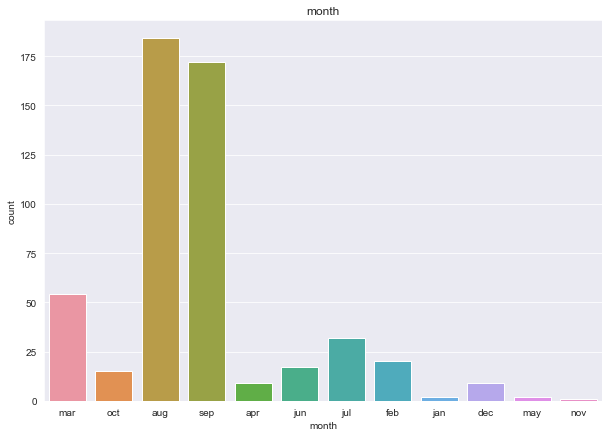

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


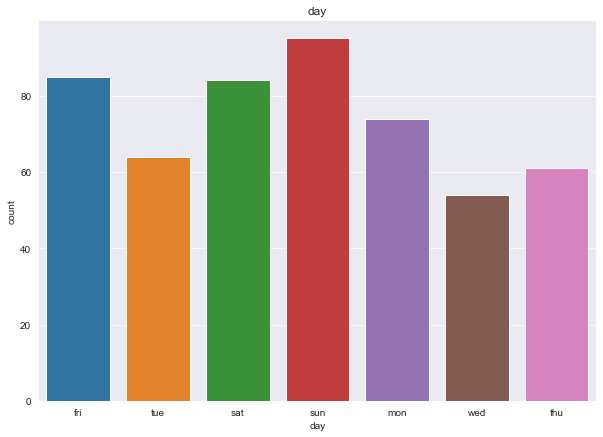

small    378
large    139
Name: size_category, dtype: int64


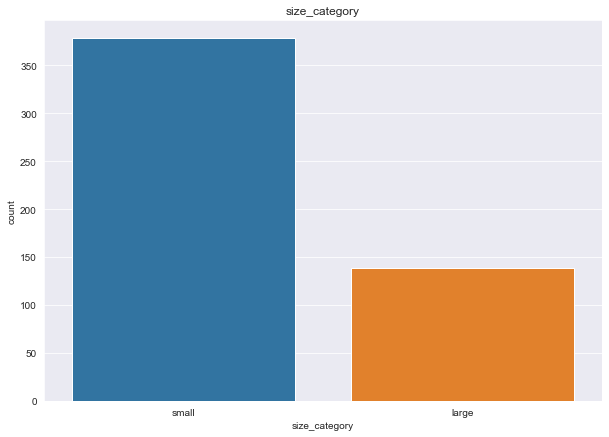

In [8]:
obj = data1[["month","day","size_category"]]

for i in obj:
    sns.set_style("darkgrid")
    plt.figure(figsize = (10,7))
    sns.countplot(obj[i])
    count = data[i].value_counts()
    plt.title(i)
    print(count)
    plt.show()

In [9]:
data1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

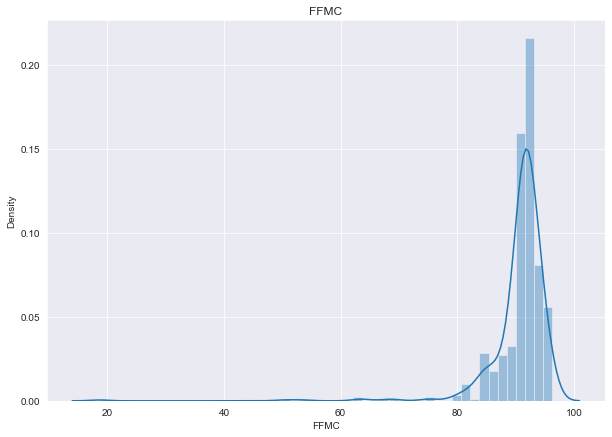

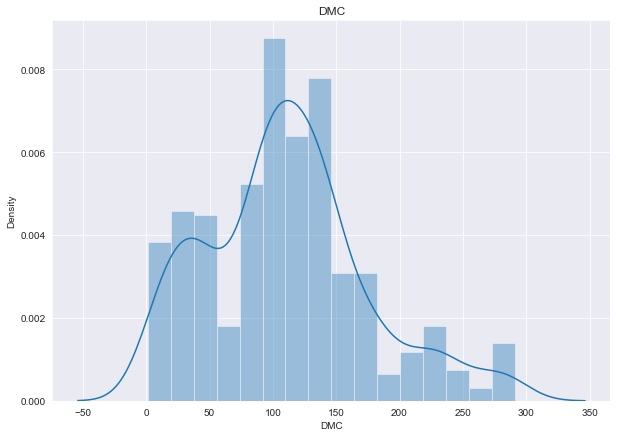

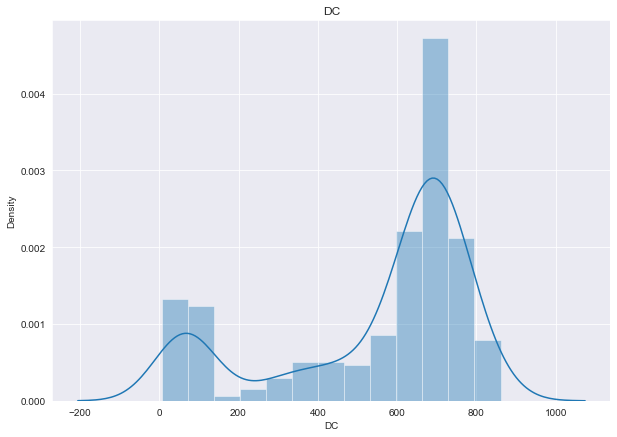

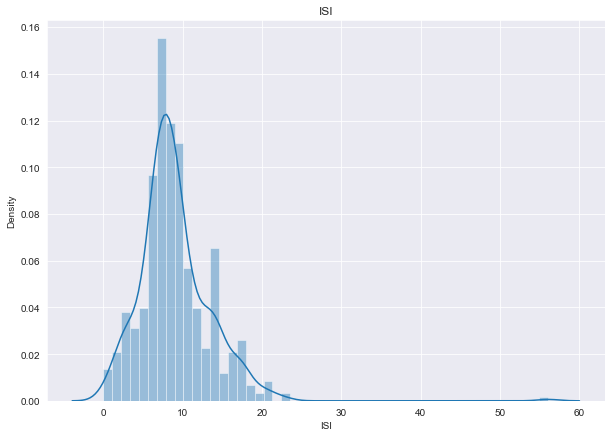

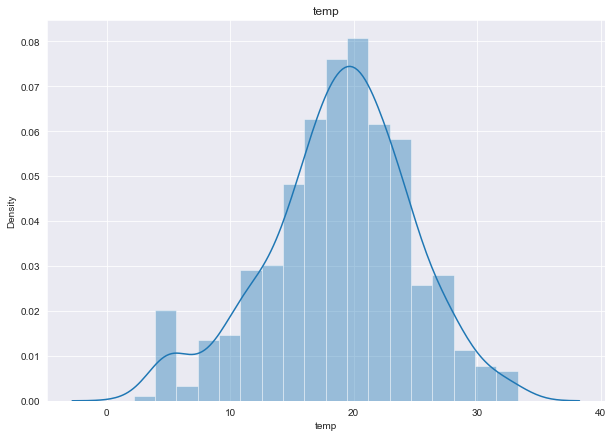

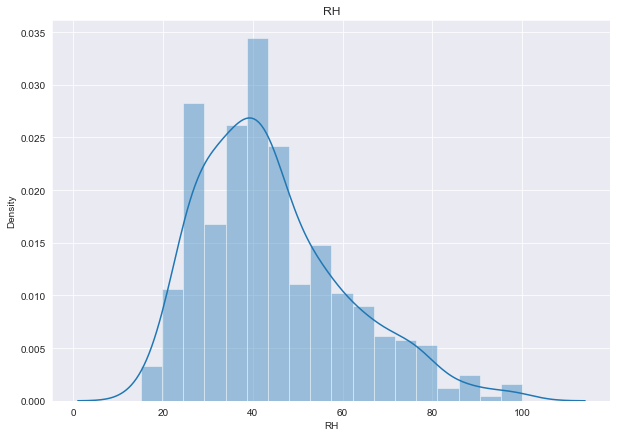

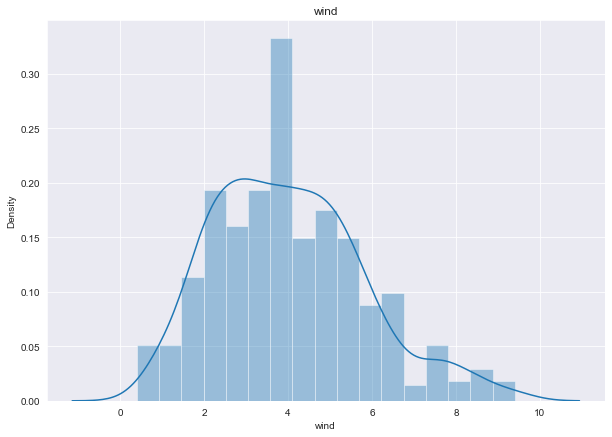

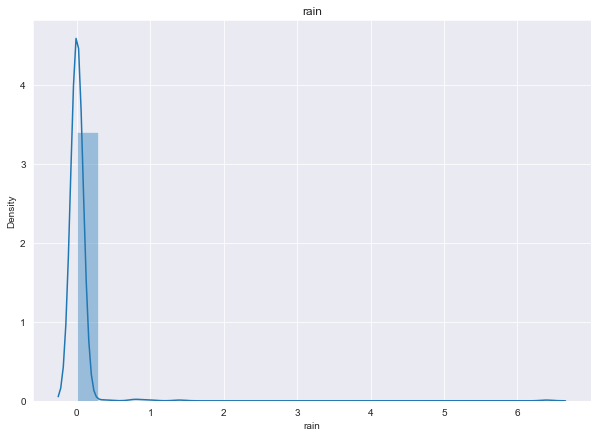

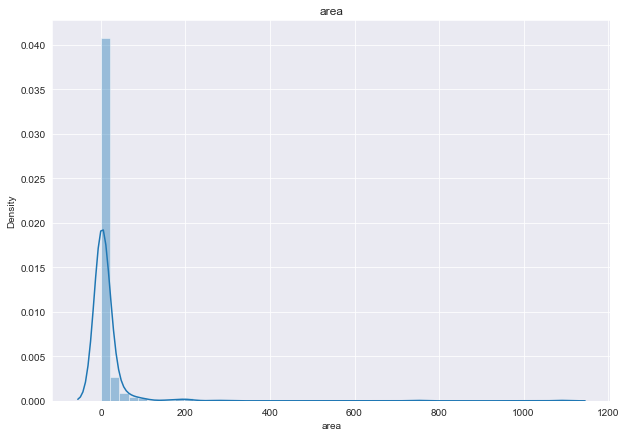

In [10]:
num = data1[["FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"]]

for i in num:
    plt.figure(figsize = (10,7))
    sns.distplot(num[i])
    plt.title(i)
    plt.show()

## Data Preparation

In [11]:
obj.columns

Index(['month', 'day', 'size_category'], dtype='object')

In [12]:
#performing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1["month"] = le.fit_transform(data.month)
data1["day"] = le.fit_transform(data.day)
data1["size_category"] = le.fit_transform(data.size_category)
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [13]:
#train test split
X = data1.iloc[:,:11]
y = data1["size_category"]
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [14]:
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(361, 11) (156, 11) (361,) (156,)


## Neural Networks Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
#compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
output_compile = model.fit(Xtrain,ytrain,epochs = 30,validation_split = 0.2,batch_size = 10)

Epoch 1/30
29/29 [==============================] - 1s 10ms/step - loss: 5.3859 - accuracy: 0.3958 - val_loss: 1.5730 - val_accuracy: 0.5753
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 1.3576 - accuracy: 0.6042 - val_loss: 1.2636 - val_accuracy: 0.5616
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 1.2029 - accuracy: 0.5556 - val_loss: 1.1277 - val_accuracy: 0.5753
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 1.1058 - accuracy: 0.5972 - val_loss: 1.0052 - val_accuracy: 0.5753
Epoch 5/30
29/29 [==============================] - 0s 2ms/step - loss: 1.0213 - accuracy: 0.5729 - val_loss: 0.8790 - val_accuracy: 0.5890
Epoch 6/30
29/29 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.6215 - val_loss: 0.8177 - val_accuracy: 0.5890
Epoch 7/30
29/29 [==============================] - 0s 2ms/step - loss: 0.8206 - accuracy: 0.6076 - val_loss: 0.7231 - val_accuracy: 0.6301
Epoch 8/30
29/29 [=

In [19]:
#checking weights
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 12) dtype=float32, numpy=
 array([[ 0.04961419,  0.0681238 , -0.2919696 ,  0.31474483, -0.50718874,
          0.31095868, -0.34621882, -0.21742749, -0.47824478, -0.41865623,
         -0.2265136 ,  0.13927788],
        [-0.27495262,  0.1231153 , -0.01200086,  0.19232422,  0.41709358,
          0.29870024, -0.33241567, -0.0585638 ,  0.09329157, -0.10150465,
         -0.4375441 , -0.02861574],
        [-0.3497885 ,  0.24231909, -0.00892746, -0.08978924,  0.07219333,
         -0.4417201 , -0.39200005, -0.18326569, -0.14174598, -0.03672751,
         -0.11678183,  0.00448209],
        [-0.3227591 , -0.1550042 , -0.15149784, -0.03565338, -0.12098318,
         -0.0594844 , -0.16003293, -0.0885192 ,  0.12595326,  0.10361028,
          0.07858054, -0.03870866],
        [-0.06842706,  0.30551472, -0.12324035, -0.12662175, -0.15515956,
         -0.14787292, -0.19073923,  0.33399868,  0.3479963 ,  0.48023647,
          0.15879224, -0.38034016],
        [-0.

In [20]:
# evaluate the model
scores = model.evaluate(Xtest, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.7949
accuracy: 79.49%


In [21]:
ypred = model.predict(Xtest)
ypred

5/5 [==============================] - 0s 1ms/step


array([[3.5856986e-01],
       [8.3486831e-01],
       [8.7057185e-01],
       [9.1125870e-01],
       [8.9828491e-01],
       [9.4784337e-01],
       [6.1062950e-01],
       [7.7718252e-01],
       [9.2491168e-01],
       [8.0440736e-01],
       [8.6325312e-01],
       [8.9355069e-01],
       [8.9889014e-01],
       [8.7110263e-01],
       [8.9570236e-01],
       [8.4763718e-01],
       [8.4203511e-01],
       [9.4147491e-01],
       [8.5176909e-01],
       [8.0564928e-01],
       [2.7036020e-01],
       [7.2246724e-01],
       [5.9890234e-01],
       [7.3074752e-01],
       [9.1607237e-01],
       [8.9998096e-01],
       [9.6773183e-01],
       [8.5076183e-01],
       [9.1178048e-01],
       [9.0034080e-01],
       [8.2046402e-01],
       [7.8090072e-01],
       [8.9585692e-01],
       [9.0684611e-01],
       [9.7563398e-01],
       [8.2648414e-01],
       [8.7038368e-01],
       [1.7513369e-01],
       [8.6552143e-01],
       [8.2685757e-01],
       [8.5402423e-01],
       [9.235303

In [22]:
# list all data in history
output_compile.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

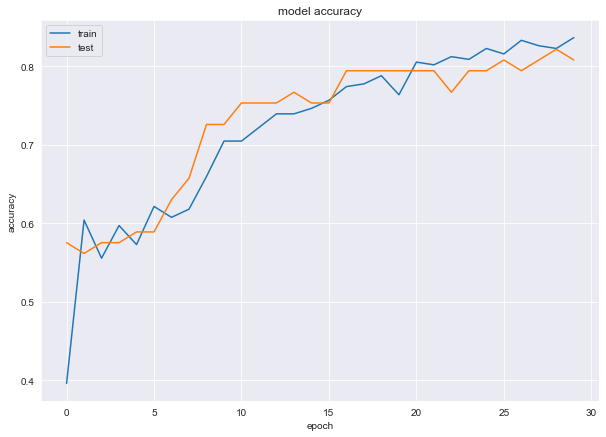

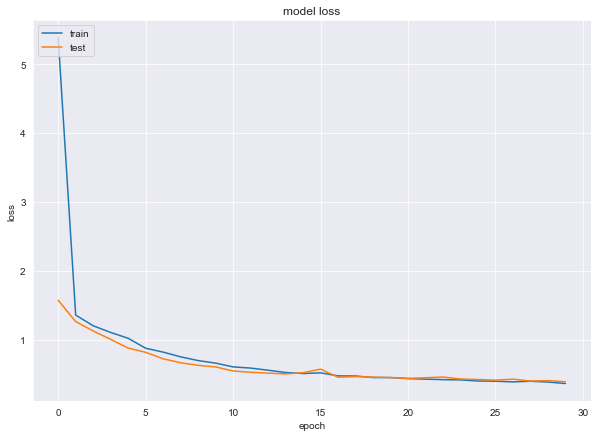

In [23]:
# summarize history for accuracy
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
plt.plot(output_compile.history['accuracy'])
plt.plot(output_compile.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(output_compile.history['loss'])
plt.plot(output_compile.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
#visulaizing in confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels = ytest,predictions = ypred)

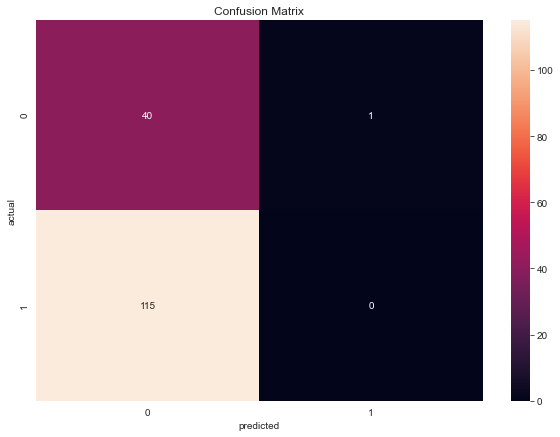

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot = True,fmt = "d")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()